In [ ]:
#import all required modules and library
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [ ]:
#Upload the Dataset
from google.colab import files
dataset = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


In [ ]:
#Read the Dataset And display 
dataset = pd.read_csv("heart_failure_clinical_records_dataset.csv")
dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
#Get some information of Type of Data
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


In [ ]:
#COMMENT
#all the dataset are of type int/float. No String data are there in the datset.
#So, during data pre-processing , if pre-processing needed no need to drop/add/replace the string value

In [ ]:
#DATA PRE_PROCESSING
#Check for any NA/missing values in the dataset
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
#COMMENT
#isnull().sum() will return Number of missing values.
#In this case the result is 0 for all column . So there is no missing data.
#There is no String data also available. 
#So, No need to do any Pre-processing .
#NOTE : If there was any missing values, I should have taken the medians for the missing values and process like below
#temp_df = dataset
#temp_df
#medians = temp_df.median()
#df = temp_df.replace(0,medians)


In [ ]:
#DATA VISUALIZATION

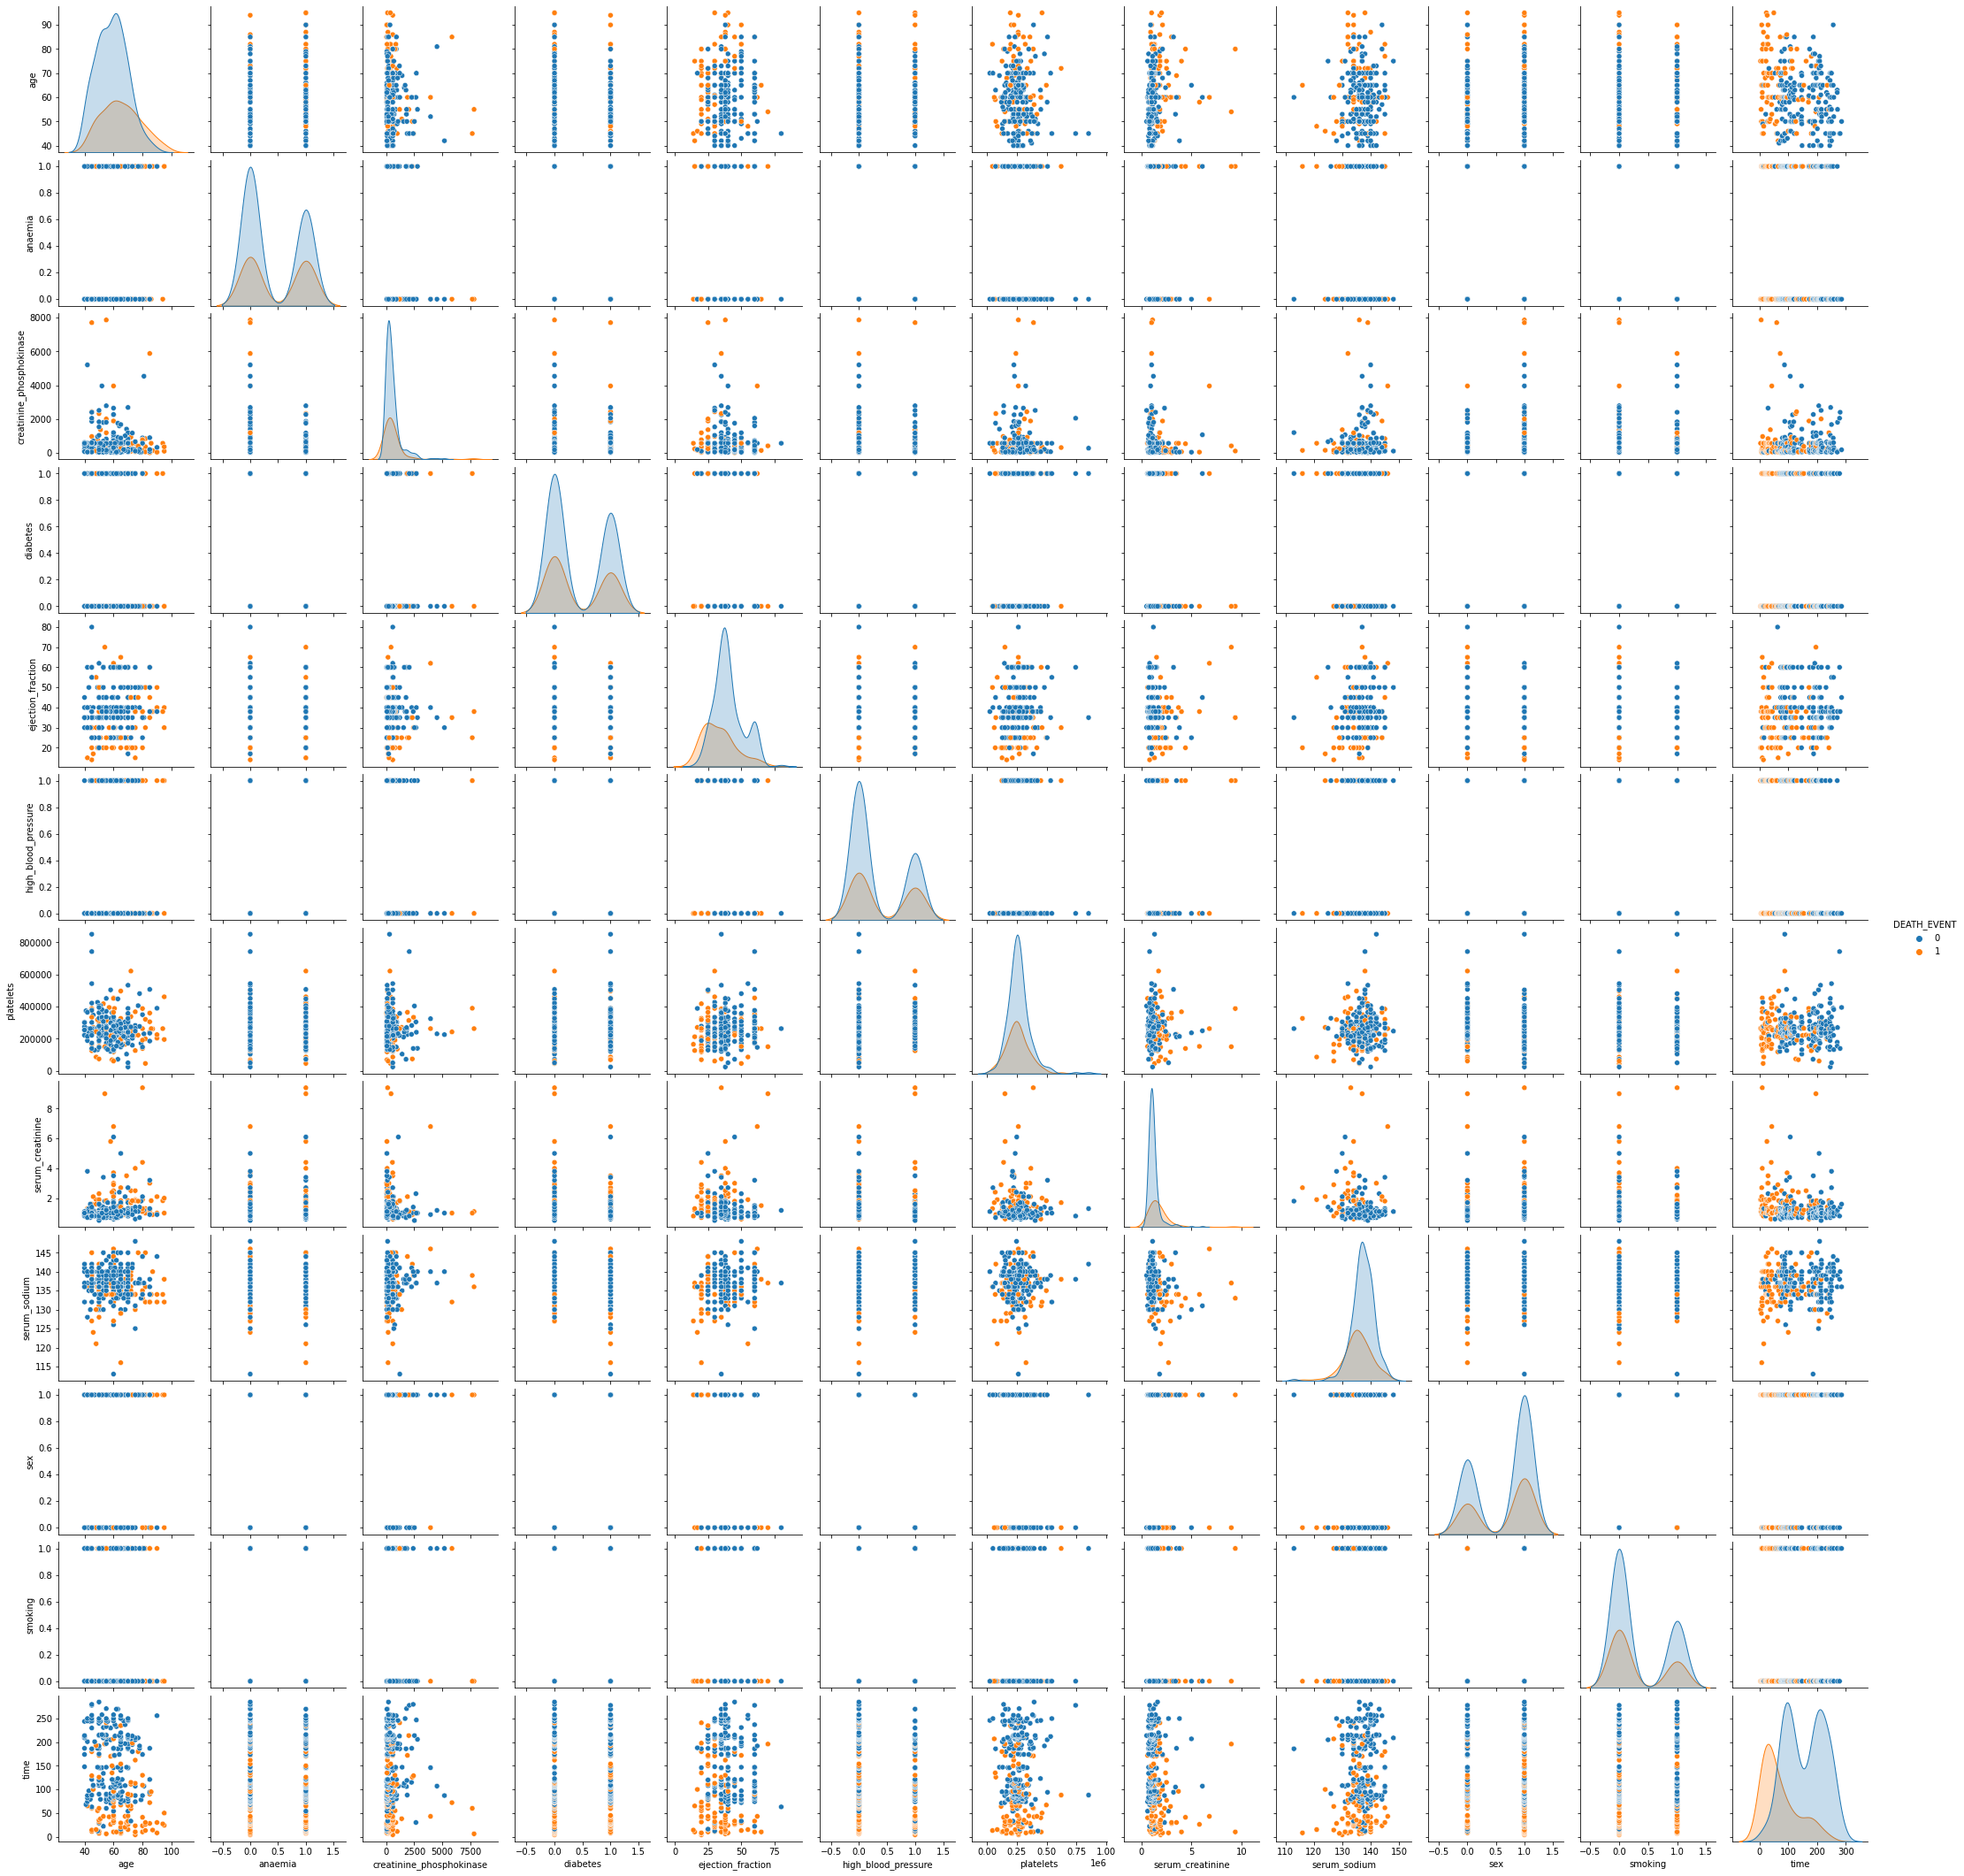

In [ ]:
sns.pairplot(dataset, hue ='DEATH_EVENT')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


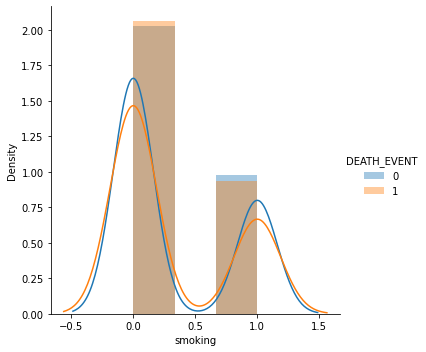

In [ ]:
#Plot Histogram and Distribution
sns.FacetGrid(dataset,hue='DEATH_EVENT',size=5).map(sns.distplot,'smoking').add_legend()

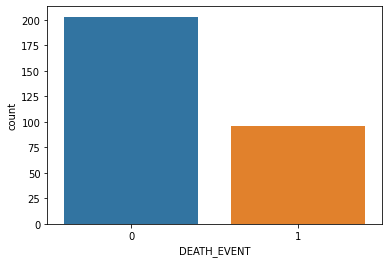

In [ ]:
sns.countplot(x='DEATH_EVENT', data=dataset)

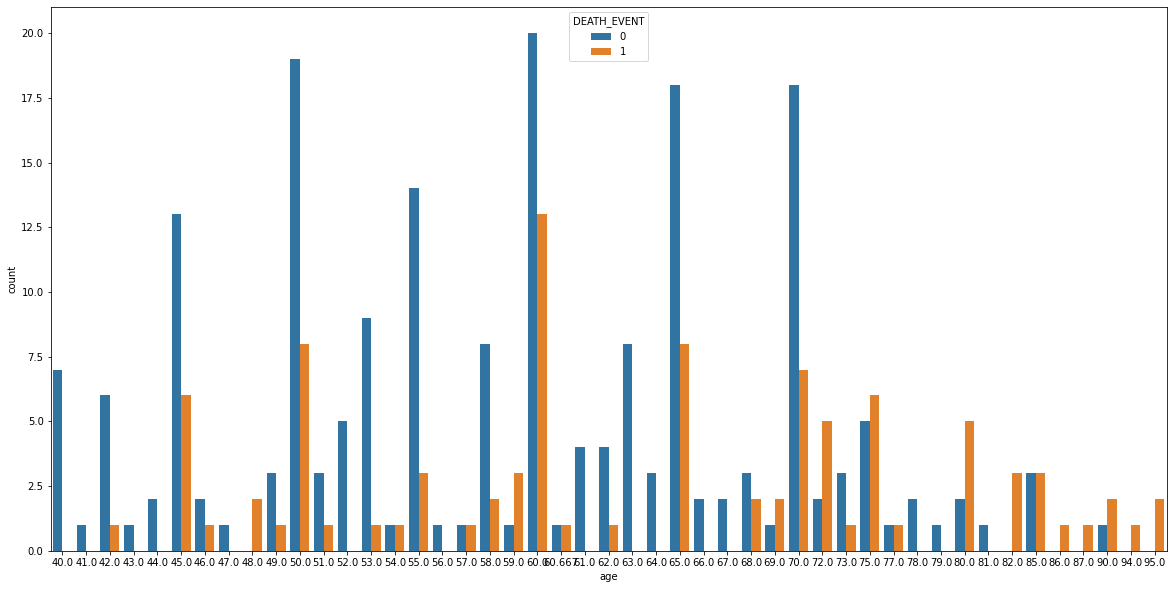

In [ ]:
#Visulize Age And Death
plt.figure(figsize=(20,10))
sns.countplot(x ="age", data=dataset, hue ="DEATH_EVENT");

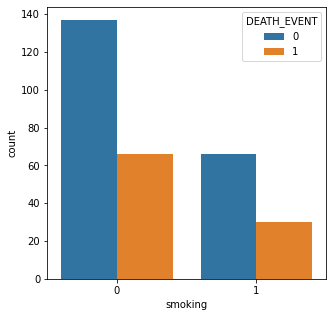

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x ="smoking", data=dataset, hue ="DEATH_EVENT");

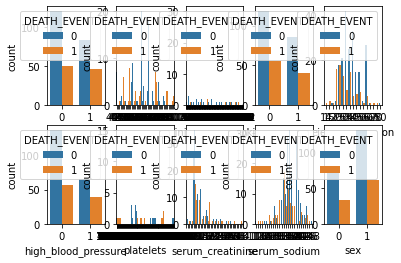

In [ ]:
fig, ax =plt.subplots(2,5)
sns.countplot(x ="anaemia", data=dataset, hue ="DEATH_EVENT",ax=ax[0,0]);
sns.countplot(x ="age", data=dataset, hue ="DEATH_EVENT",ax=ax[0,1]);
sns.countplot(x ="creatinine_phosphokinase", data=dataset, hue ="DEATH_EVENT",ax=ax[0,2]);
sns.countplot(x ="diabetes", data=dataset, hue ="DEATH_EVENT",ax=ax[0,3]);
sns.countplot(x ="ejection_fraction", data=dataset, hue ="DEATH_EVENT",ax=ax[0,4]);
sns.countplot(x ="high_blood_pressure", data=dataset, hue ="DEATH_EVENT",ax=ax[1,0]);
sns.countplot(x ="platelets", data=dataset, hue ="DEATH_EVENT",ax=ax[1,1]);
sns.countplot(x ="serum_creatinine", data=dataset, hue ="DEATH_EVENT",ax=ax[1,2]);
sns.countplot(x ="serum_sodium", data=dataset, hue ="DEATH_EVENT",ax=ax[1,3]);
sns.countplot(x ="sex", data=dataset, hue ="DEATH_EVENT",ax=ax[1,4]);


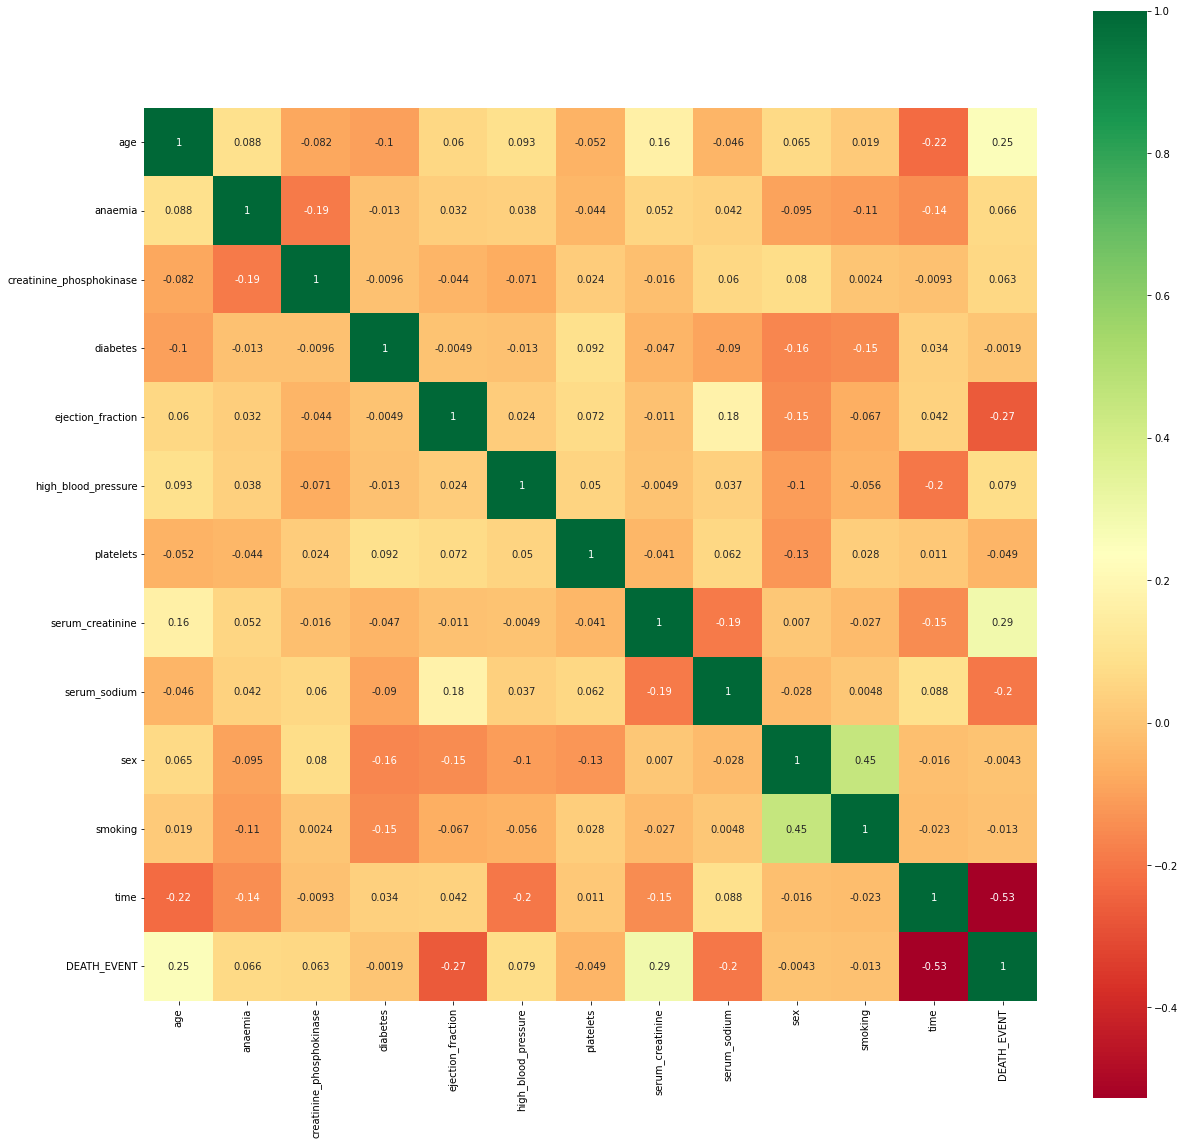

In [ ]:
#Co-relation matrix
plt.figure(figsize=(20,20))
p=sns.heatmap(dataset.corr(), annot=True,cmap='RdYlGn',square=True)  

In [ ]:
#COMMENT
#There is Positive Co-relation between Age and DEATH-EVENT
#time and ejection fraction have a Negative co-relation with DEATH-EVENT.
#NOTE : There are few other co-relation exists, but seems not so strong

In [ ]:
#Target and Feature Variable 
#Feature Selection
# The data seems to be sorted on time column. Let's correct it

x = dataset.drop("DEATH_EVENT", axis=1)
y = dataset.DEATH_EVENT
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
#Split training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [ ]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [ ]:
#Linear Regression
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn import linear_model
ols = linear_model.LinearRegression()
model = ols.fit(x, y)


In [ ]:
model.coef_

array([ 5.76657831e-03, -2.76587965e-03,  3.42661334e-05,  1.92752033e-02,
       -9.83364951e-03, -1.42967375e-02, -8.37030531e-08,  8.52686629e-02,
       -7.59914458e-03, -6.36853569e-02, -5.73264398e-03, -2.73284170e-03])

In [ ]:
model.intercept_

1.6635558128941166

In [ ]:
y_prediction =  LR.predict(x_test)
y_prediction

array([ 0.62461106,  0.01452021,  0.03444715, -0.05480742, -0.29116901,
       -0.17095438,  0.52780601,  0.5613772 ,  0.10435937, -0.08376577,
        0.1722996 ,  0.28428975, -0.30104557,  0.17459898,  0.79042262,
        0.39441899,  0.15981396,  0.05241052,  0.31432752,  0.60012564,
        0.51704643,  0.82985009,  0.15877069,  0.32122697, -0.06995801,
        0.47163883,  0.77728545,  0.27150918,  0.11812733,  0.7911556 ,
        0.20089777,  0.09360276,  0.66190455,  0.36988658,  0.42819579,
        0.44300399,  0.18390983,  0.3108104 ,  0.41000222,  0.00191474,
        0.58308847,  0.33297752,  0.62706143,  0.61305379,  0.01006816,
        0.58080209,  0.23638918,  0.12354755,  1.15796671,  0.46852391,
        0.39792415,  0.29670927, -0.30625194,  0.87523581,  0.58140516,
        0.29894462,  0.4408421 ,  0.33155506,  0.59807462, -0.12973594])

In [ ]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print("r2 socre is ",score)
print("mean_sqrd_error is==",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.38976979727269057
mean_sqrd_error is== 0.1388273711204629
root_mean_squared error of is== 0.3725954523614894


In [ ]:
from sklearn.preprocessing import StandardScaler
models = {"KNN": KNeighborsClassifier(),
          "LogisticReg": LogisticRegression(),
          "NB": GaussianNB(),
          "DT": DecisionTreeClassifier(),
          "LDA" : LinearDiscriminantAnalysis()
          #"LR": LinearRegression(),
         # "SVC" : SVC(kernel='linear')
          }

# A function to select the best model
def find_best_model(models, X_train, X_test, y_train, y_test):
    scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        scores[name] = model.score(x_test, y_test)
        #prediction 
        print("**********"+name+"**************")
        y_pred = model.predict(x_test)
        evaluate_preds(y_test, y_pred)
        cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
        print("Confusion Matrix")
        print(cnf_matrix)
        print("ROC Curve")
        y_pred_proba = model.predict_proba(x_test)[::,1]
        fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
        auc = metrics.roc_auc_score(y_test, y_pred_proba)
        plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
        plt.legend(loc=4)
        plt.show()
    return scores

**********KNN**************
Acc: 55.00%
Precision: 0.29
Recall: 0.19
F1 score: 0.23
Confusion Matrix
[[29 10]
 [17  4]]
ROC Curve


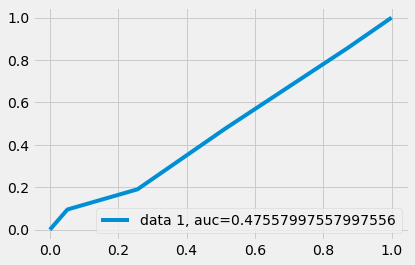

**********LogisticReg**************
Acc: 80.00%
Precision: 0.80
Recall: 0.57
F1 score: 0.67
Confusion Matrix
[[36  3]
 [ 9 12]]
ROC Curve


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


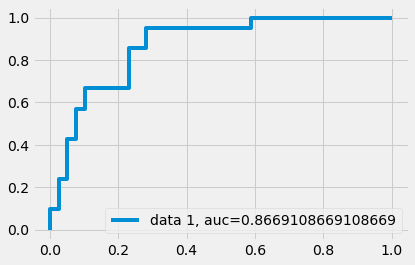

**********NB**************
Acc: 80.00%
Precision: 0.85
Recall: 0.52
F1 score: 0.65
Confusion Matrix
[[37  2]
 [10 11]]
ROC Curve


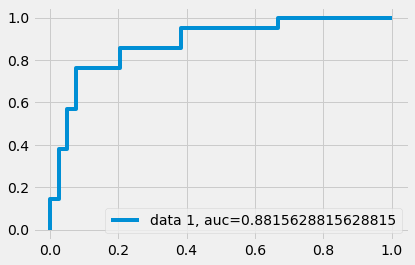

**********DT**************
Acc: 76.67%
Precision: 0.73
Recall: 0.52
F1 score: 0.61
Confusion Matrix
[[35  4]
 [10 11]]
ROC Curve


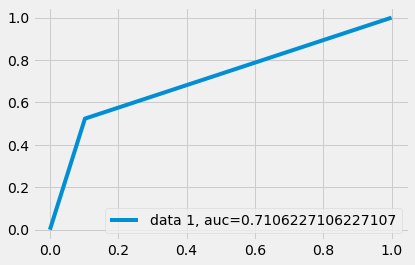

**********LDA**************
Acc: 81.67%
Precision: 0.78
Recall: 0.67
F1 score: 0.72
Confusion Matrix
[[35  4]
 [ 7 14]]
ROC Curve


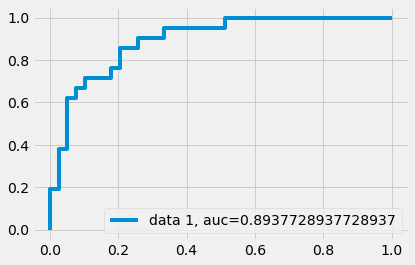

{'DT': 0.7666666666666667,
 'KNN': 0.55,
 'LDA': 0.8166666666666667,
 'LogisticReg': 0.8,
 'NB': 0.8}

In [ ]:
# Let's see which algorithm performs best
scores = find_best_model(models=models, X_train=x_train, X_test=x_test, y_train=y_train, y_test=y_test)
scores

In [ ]:
#Linear Discrimant Analysis
from matplotlib import style
style.use('fivethirtyeight')

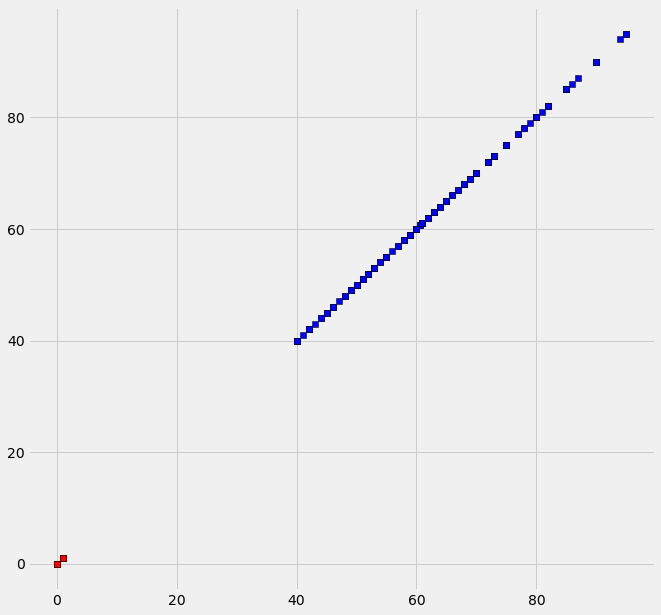

In [ ]:
#Plot the data
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.scatter(dataset['anaemia'],dataset['anaemia'],marker='s',c='grey',edgecolor='black')
ax0.scatter(dataset['age'],dataset['age'],marker='s',c='blue',edgecolor='black')
ax0.scatter(dataset['smoking'],dataset['smoking'],marker='s',c='red',edgecolor='black')
ax0.scatter(dataset['sex'],dataset['sex'],marker='s',c='red',edgecolor='black')


In [ ]:
#clf = SVC(kernel='linear',probability=True) 
clf = SVC(kernel='linear') 
clf.fit(x_train, y_train) 

SVC(kernel='linear')

In [ ]:

y_pred = clf.predict(x_test)
evaluate_preds(y_test, y_pred)


Acc: 75.00%
Precision: 0.86
Recall: 0.48
F1 score: 0.62


{'accuracy': 0.75, 'f1': 0.62, 'precision': 0.86, 'recall': 0.48}

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cnf_matrix)


Confusion Matrix
[[33  2]
 [13 12]]


In [ ]:
#print("ROC Curve")
#y_pred_proba = clf.predict_proba(x_test)[::,1]
#fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#auc = metrics.roc_auc_score(y_test, y_pred_proba)
#plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
#plt.legend(loc=4)
#plt.show()

NameError: ignored

In [ ]:
#The above code is commented because it's not possible to Plot ROC curve with Prediction = No.
# If , I make prediction = Yes , it takes lots of time to execute the above line of code.

In [ ]:
#COMMENT
#Linear regression is not an ideal apporach for this Problem.As we have to identify the DEATH_EVENT .
#This can be solved using Classifier problem.
#In this problem, as calculated above, the Accuracy Score with Naive Bayes class ifier is nearly 80%. However Accuracy is not the only criteria to choose the 
# correct classifier
# The ROC curve can be used for proper selection of the classifier.
#With different classifier , It is identified that LDA have higher Aread Under Curve. 
#It seems that, LDA can be used as a good Classifier for this problem